# Exploratory Data Analysis 

<div class="alert alert-block alert-info">
Nanyang Technological University<br>
<i>CZ1115 Data Science and Artifical Intelligence</i>, 20/21 Sem 2
    

FSP4 - Alpha Vantage Dataset<br>
    
Tejas Rajagopal (TEJAS006@e.ntu.edu.sg)<br>
Arushi Bansal (ARUSHI003@e.ntu.edu.sg)<br>
Raghav Nair(RAGHAV004@e.ntu.edu.sg)<br>
</div>

### Importing Relevant Libraries 

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
from alpha_vantage.sectorperformance import SectorPerformances
from alpha_vantage.cryptocurrencies import CryptoCurrencies
import os
# Make plots bigger
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

In [5]:
#import the dataset 
crypto_data = pd.read_csv('cleaned_data.csv')

#describe our data 
crypto_data.info()
display(crypto_data.describe())
crypto_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   timestamp         1000 non-null   object 
 1   BTC close(USD)    1000 non-null   float64
 2   BTC mktcap(USD)   1000 non-null   float64
 3   ETH close(USD)    1000 non-null   float64
 4   ETH mktcap(USD)   1000 non-null   float64
 5   BNB close(USD)    1000 non-null   float64
 6   BNB mktcap(USD)   1000 non-null   float64
 7   XRP close(USD)    1000 non-null   float64
 8   XRP mktcap(USD)   1000 non-null   float64
 9   ADA close(USD)    1000 non-null   float64
 10  ADA mktcap(USD)   1000 non-null   float64
 11  LTC close(USD)    1000 non-null   float64
 12  LTC mktcap(USD)   1000 non-null   float64
 13  XLM close(USD)    1000 non-null   float64
 14  XLM mktcap(USD)   1000 non-null   float64
 15  EOS close(USD)    1000 non-null   float64
 16  EOS mktcap(USD)   1000 non-null   float64
 

,BTC close(USD),BTC mktcap(USD),ETH close(USD),ETH mktcap(USD),BNB close(USD),BNB mktcap(USD),XRP close(USD),XRP mktcap(USD),ADA close(USD),ADA mktcap(USD),LTC close(USD),LTC mktcap(USD),XLM close(USD),XLM mktcap(USD),EOS close(USD),EOS mktcap(USD),QTUM close(USD),QTUM mktcap(USD),TRX close(USD),TRX mktcap(USD)
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1.000000e+03,1000.000000,1.000000e+03,1000.000000,1.000000e+03,1000.000000,1.000000e+03,1000.000000,1.000000e+03,1000.000000,1.000000e+03,1000.000000,1.000000e+03,1000.000000,1.000000e+03
mean,12989.200100,56501.073547,397.081820,6.502441e+05,40.103725,2.668882e+06,0.333767,3.172951e+08,0.160585,3.015078e+08,74.769450,6.426280e+05,0.138931,1.490980e+08,3.753082,1.346619e+07,3.041009,2.218790e+06,0.025816,1.195959e+09
std,13295.371538,35710.207119,477.575741,5.131512e+05,80.803575,1.870855e+06,0.176126,6.240642e+08,0.286985,2.986435e+08,47.858866,6.806345e+05,0.112583,2.390425e+08,1.390089,1.479166e+07,2.243663,3.407801e+06,0.018107,1.312157e+09
min,3211.720000,1609.784422,83.760000,4.141744e+04,4.516000,4.103042e+05,0.135490,2.398929e+07,0.023290,1.541702e+07,23.080000,3.528840e+04,0.031740,5.637974e+06,1.727100,7.494952e+05,1.039000,5.504024e+04,0.008410,9.648337e+07
25%,6528.682500,32518.834371,165.892500,2.984917e+05,13.675075,1.429020e+06,0.240488,6.467960e+07,0.043765,1.218496e+08,45.437500,2.198332e+05,0.069665,3.413395e+07,2.650850,5.716641e+06,1.942750,3.724353e+05,0.016643,5.307862e+08
50%,8856.570000,47744.439726,217.920000,5.167110e+05,18.559900,2.327523e+06,0.297705,1.213462e+08,0.073155,2.127747e+08,57.740000,3.822648e+05,0.095150,7.716450e+07,3.266800,8.635229e+06,2.376500,1.032162e+06,0.022780,8.116043e+08
75%,11111.815000,70687.103072,365.207500,8.443748e+05,28.528275,3.271172e+06,0.373400,2.624862e+08,0.105893,3.531909e+08,81.825000,7.685221e+05,0.165203,1.713856e+08,4.643050,1.457491e+07,3.293750,2.862001e+06,0.027195,1.357739e+09
max,63575.000000,402201.673764,2514.040000,4.663240e+06,596.710400,2.018886e+07,1.834680,8.608358e+09,1.478200,2.059110e+09,308.430000,4.989529e+06,0.657010,3.305718e+09,8.564500,1.233770e+08,18.380000,4.267873e+07,0.164210,1.451407e+10


,timestamp,BTC close(USD),BTC mktcap(USD),ETH close(USD),ETH mktcap(USD),BNB close(USD),BNB mktcap(USD),XRP close(USD),XRP mktcap(USD),ADA close(USD),...,LTC close(USD),LTC mktcap(USD),XLM close(USD),XLM mktcap(USD),EOS close(USD),EOS mktcap(USD),QTUM close(USD),QTUM mktcap(USD),TRX close(USD),TRX mktcap(USD)
0,2021-04-21,56395.68,1609.784422,2350.71,4.141744e+04,576.7544,426547.695,1.40664,3.694768e+07,1.26773,...,267.23,6.471902e+04,0.52482,15456016.1,6.7764,1835882.92,16.727,5.449617e+05,0.13405,9.648337e+07
1,2021-04-20,56425.00,72744.482151,2330.03,9.922408e+05,586.3635,5730895.325,1.38501,1.522196e+09,1.26689,...,260.68,2.111225e+06,0.52877,278004526.2,6.6944,43365500.85,17.496,7.424156e+06,0.13279,3.116151e+09
2,2021-04-19,55633.14,78229.042267,2161.12,8.205923e+05,504.0322,5031325.713,1.30945,1.608074e+09,1.19450,...,261.38,1.973512e+06,0.49982,312750231.6,6.6005,54389682.92,18.299,1.541662e+07,0.12993,3.094362e+09
3,2021-04-18,56150.01,124882.131824,2235.64,1.475384e+06,481.4367,4468597.460,1.40797,2.048345e+09,1.27693,...,273.36,3.346590e+06,0.54459,455418601.4,7.2854,84548001.96,18.380,1.113304e+07,0.14302,4.773187e+09
4,2021-04-17,60006.66,58912.256128,2317.60,6.242323e+05,514.6861,2949040.221,1.53896,1.108826e+09,1.36802,...,300.86,2.574520e+06,0.59137,263520955.4,7.7859,59682689.57,17.246,5.098480e+06,0.15535,4.516595e+09


In [6]:
crypto_data = crypto_data.iloc[1: , :]
crypto_data.head()

,timestamp,BTC close(USD),BTC mktcap(USD),ETH close(USD),ETH mktcap(USD),BNB close(USD),BNB mktcap(USD),XRP close(USD),XRP mktcap(USD),ADA close(USD),...,LTC close(USD),LTC mktcap(USD),XLM close(USD),XLM mktcap(USD),EOS close(USD),EOS mktcap(USD),QTUM close(USD),QTUM mktcap(USD),TRX close(USD),TRX mktcap(USD)
1,2021-04-20,56425.00,72744.482151,2330.03,9.922408e+05,586.3635,5730895.325,1.38501,1.522196e+09,1.26689,...,260.68,2.111225e+06,0.52877,278004526.2,6.6944,43365500.85,17.496,7.424156e+06,0.13279,3.116151e+09
2,2021-04-19,55633.14,78229.042267,2161.12,8.205923e+05,504.0322,5031325.713,1.30945,1.608074e+09,1.19450,...,261.38,1.973512e+06,0.49982,312750231.6,6.6005,54389682.92,18.299,1.541662e+07,0.12993,3.094362e+09
3,2021-04-18,56150.01,124882.131824,2235.64,1.475384e+06,481.4367,4468597.460,1.40797,2.048345e+09,1.27693,...,273.36,3.346590e+06,0.54459,455418601.4,7.2854,84548001.96,18.380,1.113304e+07,0.14302,4.773187e+09
4,2021-04-17,60006.66,58912.256128,2317.60,6.242323e+05,514.6861,2949040.221,1.53896,1.108826e+09,1.36802,...,300.86,2.574520e+06,0.59137,263520955.4,7.7859,59682689.57,17.246,5.098480e+06,0.15535,4.516595e+09
5,2021-04-16,61334.80,91764.139884,2422.67,9.991638e+05,508.2743,4192218.462,1.54805,1.805451e+09,1.40989,...,308.43,3.150448e+06,0.61005,376225078.7,8.4974,84992024.62,18.348,9.321674e+06,0.16091,6.725692e+09


Splitting crypto_data into 2 dataframe, one consisting of all the closing prices and one consisting of market capitalization values. This step is done to easy the process of data visualisation later

In [15]:
closing_val_data = crypto_data.drop(['BTC mktcap(USD)','ETH mktcap(USD)','BNB mktcap(USD)','XRP mktcap(USD)','ADA mktcap(USD)','LTC mktcap(USD)','XLM mktcap(USD)','EOS mktcap(USD)','QTUM mktcap(USD)','TRX mktcap(USD)'],axis=1)
closing_val_data = closing_val_data.set_index('timestamp')
closing_val_data.head()



,BTC close(USD),ETH close(USD),BNB close(USD),XRP close(USD),ADA close(USD),LTC close(USD),XLM close(USD),EOS close(USD),QTUM close(USD),TRX close(USD)
timestamp,,,,,,,,,,
2021-04-20,56425.00,2330.03,586.3635,1.38501,1.26689,260.68,0.52877,6.6944,17.496,0.13279
2021-04-19,55633.14,2161.12,504.0322,1.30945,1.19450,261.38,0.49982,6.6005,18.299,0.12993
2021-04-18,56150.01,2235.64,481.4367,1.40797,1.27693,273.36,0.54459,7.2854,18.380,0.14302
2021-04-17,60006.66,2317.60,514.6861,1.53896,1.36802,300.86,0.59137,7.7859,17.246,0.15535
2021-04-16,61334.80,2422.67,508.2743,1.54805,1.40989,308.43,0.61005,8.4974,18.348,0.16091


In [16]:
mktcap_data = crypto_data.drop(['BTC close(USD)','ETH close(USD)','BNB close(USD)','XRP close(USD)','ADA close(USD)','LTC close(USD)','XLM close(USD)','EOS close(USD)','QTUM close(USD)','TRX close(USD)'],axis=1)
mktcap_data = mktcap_data.set_index('timestamp')
mktcap_data.head()

,BTC mktcap(USD),ETH mktcap(USD),BNB mktcap(USD),XRP mktcap(USD),ADA mktcap(USD),LTC mktcap(USD),XLM mktcap(USD),EOS mktcap(USD),QTUM mktcap(USD),TRX mktcap(USD)
timestamp,,,,,,,,,,
2021-04-20,72744.482151,9.922408e+05,5730895.325,1.522196e+09,470266399.2,2.111225e+06,278004526.2,43365500.85,7.424156e+06,3.116151e+09
2021-04-19,78229.042267,8.205923e+05,5031325.713,1.608074e+09,477279604.9,1.973512e+06,312750231.6,54389682.92,1.541662e+07,3.094362e+09
2021-04-18,124882.131824,1.475384e+06,4468597.460,2.048345e+09,804838502.1,3.346590e+06,455418601.4,84548001.96,1.113304e+07,4.773187e+09
2021-04-17,58912.256128,6.242323e+05,2949040.221,1.108826e+09,323840975.1,2.574520e+06,263520955.4,59682689.57,5.098480e+06,4.516595e+09
2021-04-16,91764.139884,9.991638e+05,4192218.462,1.805451e+09,562141264.2,3.150448e+06,376225078.7,84992024.62,9.321674e+06,6.725692e+09


In [38]:
print(mktcap_data.mean())
df1 = pd.DataFrame(mktcap_data.mean())
df1 = df1.reset_index()
df1.columns = ['Cryptocurrency','Average Market Capitalization']
df1.head()

BTC mktcap(USD)     5.655602e+04
ETH mktcap(USD)     6.508535e+05
BNB mktcap(USD)     2.671127e+06
XRP mktcap(USD)     3.175757e+08
ADA mktcap(USD)     3.017942e+08
LTC mktcap(USD)     6.432065e+05
XLM mktcap(USD)     1.492318e+08
EOS mktcap(USD)     1.347784e+07
QTUM mktcap(USD)    2.220465e+06
TRX mktcap(USD)     1.197060e+09
dtype: float64


,Cryptocurrency,Average Market Capitalization
0,BTC mktcap(USD),5.655602e+04
1,ETH mktcap(USD),6.508535e+05
2,BNB mktcap(USD),2.671127e+06
3,XRP mktcap(USD),3.175757e+08
4,ADA mktcap(USD),3.017942e+08


### Main Exploratory Analysis 

Goal 1: Observe any correlation between Daily market capitalization and Daily closing prices (USD) 

Goal 2: Observe any correlation between Daily closing prices of all 10 cryptocurrencies 

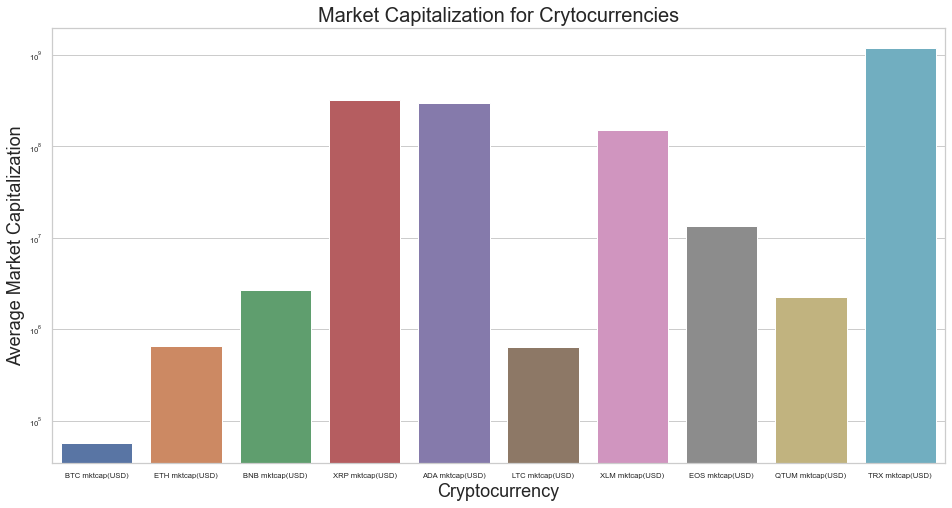

In [52]:
# Set the figure size, labels and style sheet
f = plt.figure(figsize=(16, 8))
plt.title("Market Capitalization for Crytocurrencies", fontsize = 20)
plt.xlabel('Crytocurrency',fontsize = 18)
plt.ylabel('Mktcap (USD)',fontsize = 18)
sb.set(style="whitegrid", font_scale=0.7)

# Plot with error bars
g = sb.barplot(x = df1['Cryptocurrency'], y = df1['Average Market Capitalization'], capsize=.9)
g.set_yscale("log")

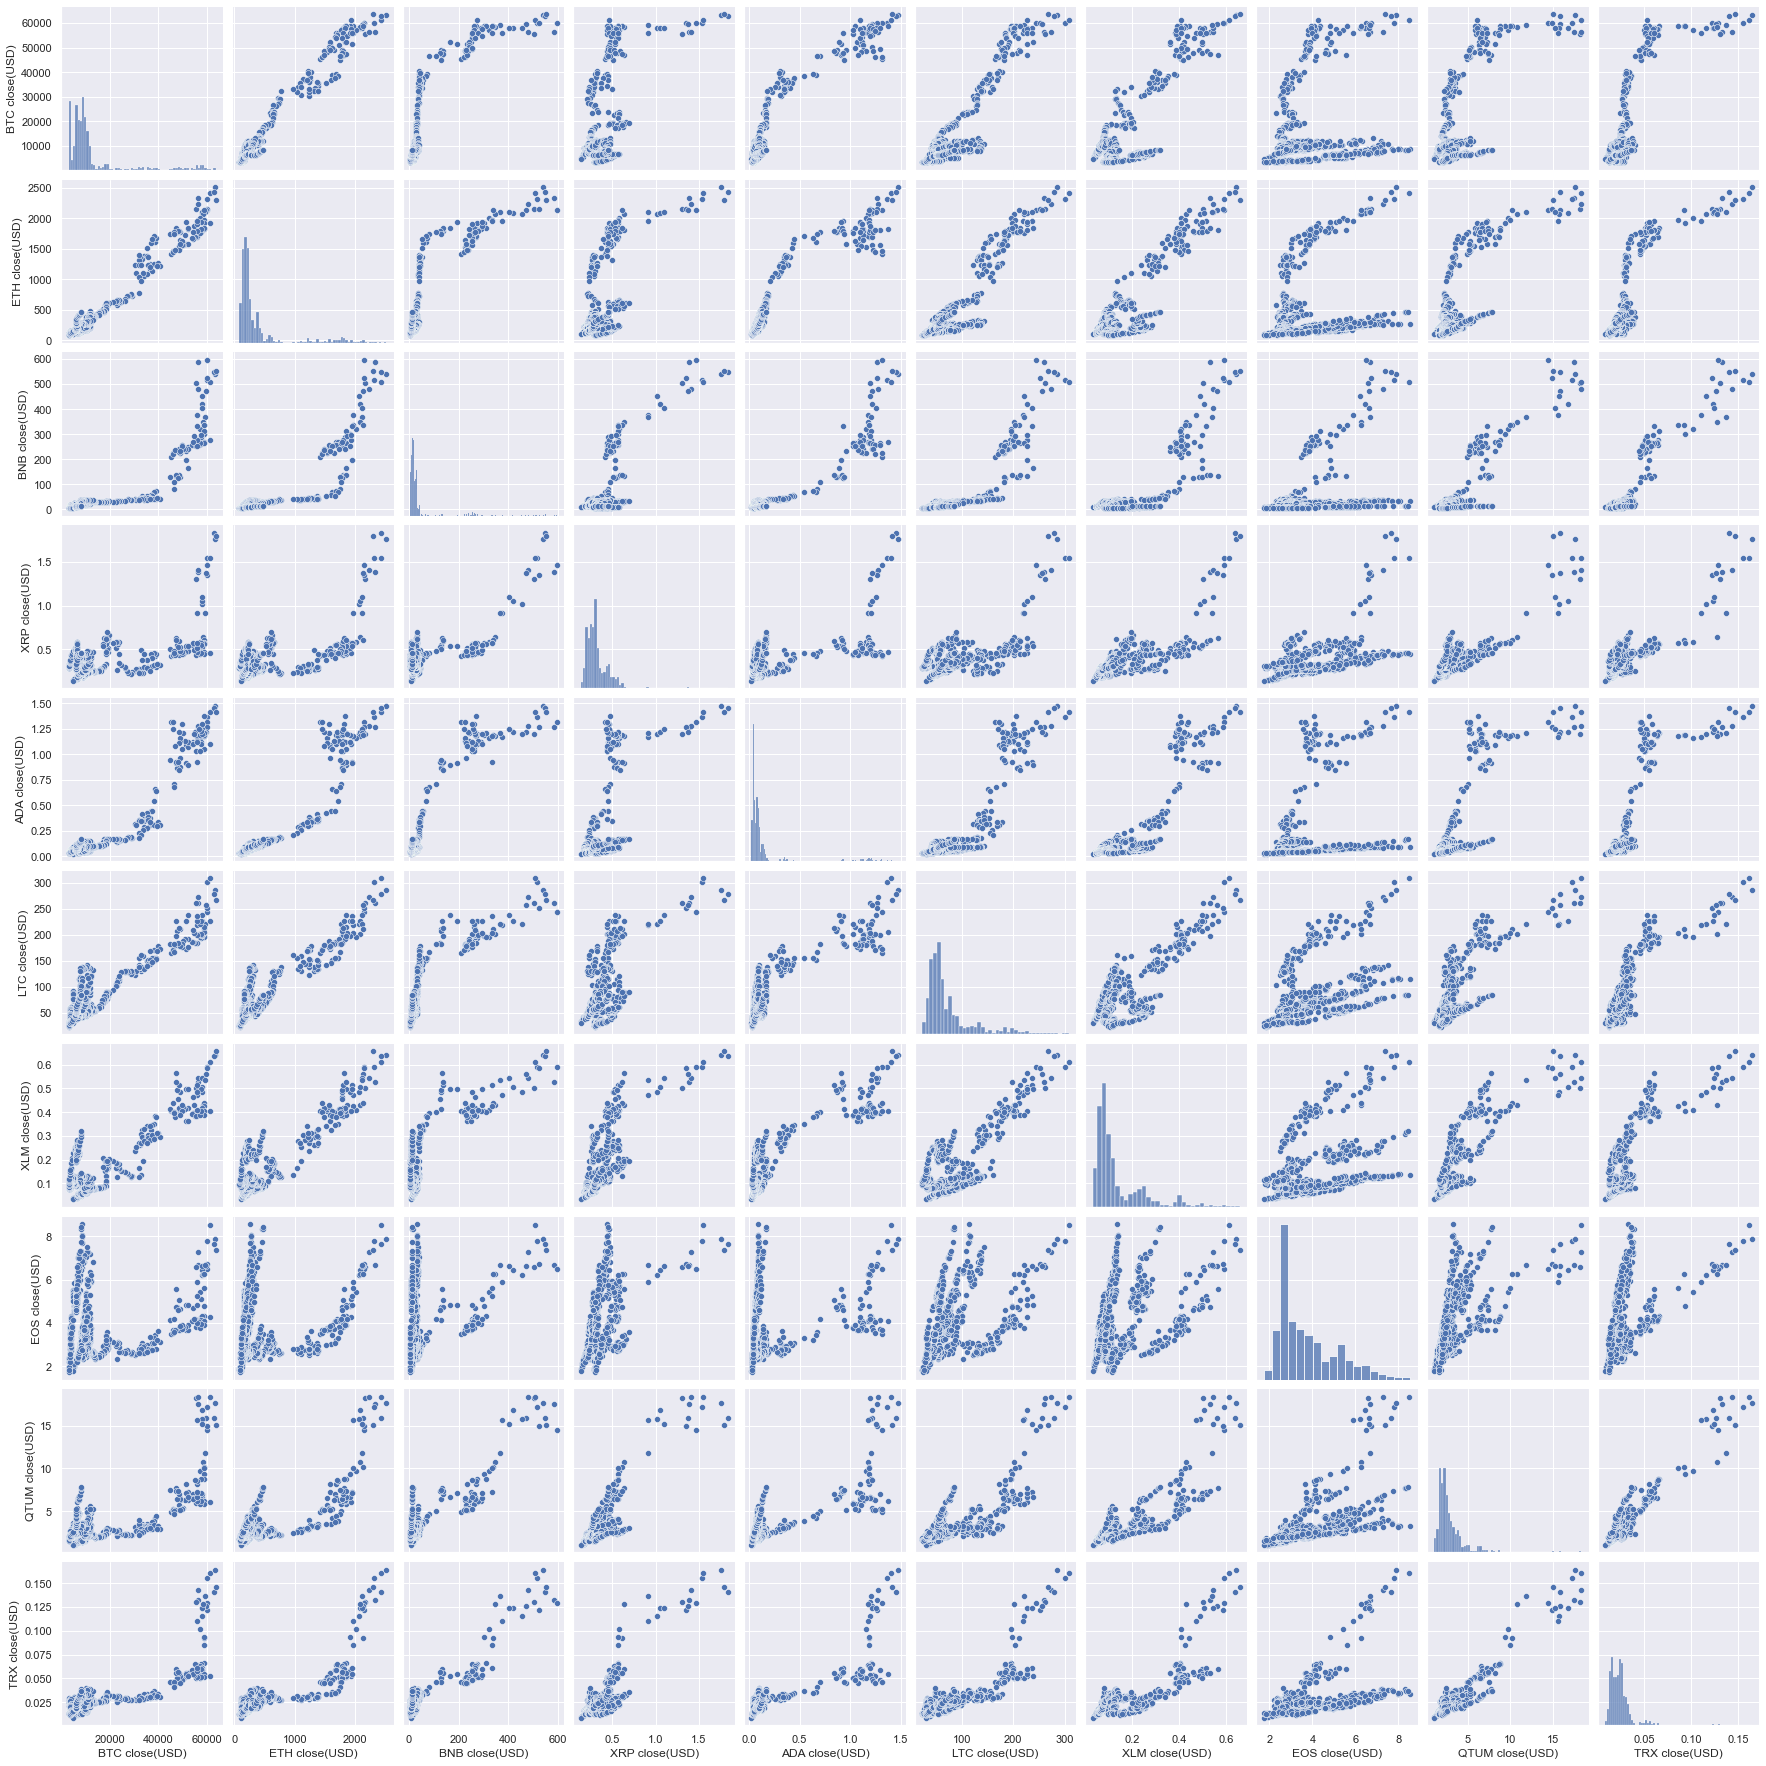

In [21]:
# Relationship between price trends of cryptocurrencies 
sb.pairplot(data = closing_val_data)

<AxesSubplot:>

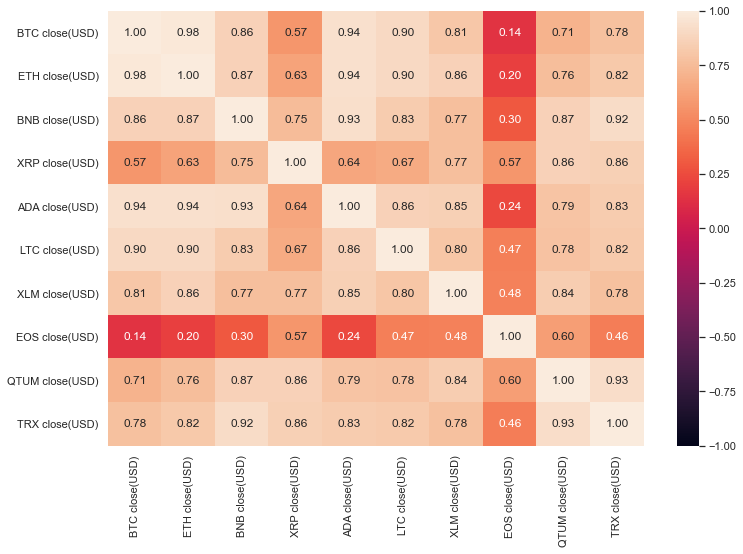

In [22]:
f = plt.figure(figsize=(12, 8))
sb.heatmap(closing_val_data.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

## Univariate and Bivariate Statistics 

In [23]:
def Uni_Variate(data):
    print(data.describe())
    # Set up matplotlib figure with three subplots
    f, axes = plt.subplots(1, 3, figsize=(24, 6))

    # Plot the basic uni-variate figures
    sb.boxplot(data = data, orient = "h", ax = axes[0])
    sb.histplot(data = data, ax = axes[1])
    sb.violinplot(data = data, orient = "h", ax = axes[2])
    

def Bi_Variate(data, col_data1: str, col_data2: str):
    # Create a joint dataframe by concatenating the two variables
    jointDF = pd.concat([data[col_data1], data[col_data2]], axis = 1)
    
    # Draw jointplot of the two variables in the joined dataframe
    f = plt.figure(figsize=(24, 4))
    sb.jointplot(data = jointDF, x = col_data1, y = col_data2, height = 12)
    
    # Calculate the correlation between the two columns/variables
    f = plt.figure(figsize=(8, 4))
    sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

<Figure size 1728x288 with 0 Axes>

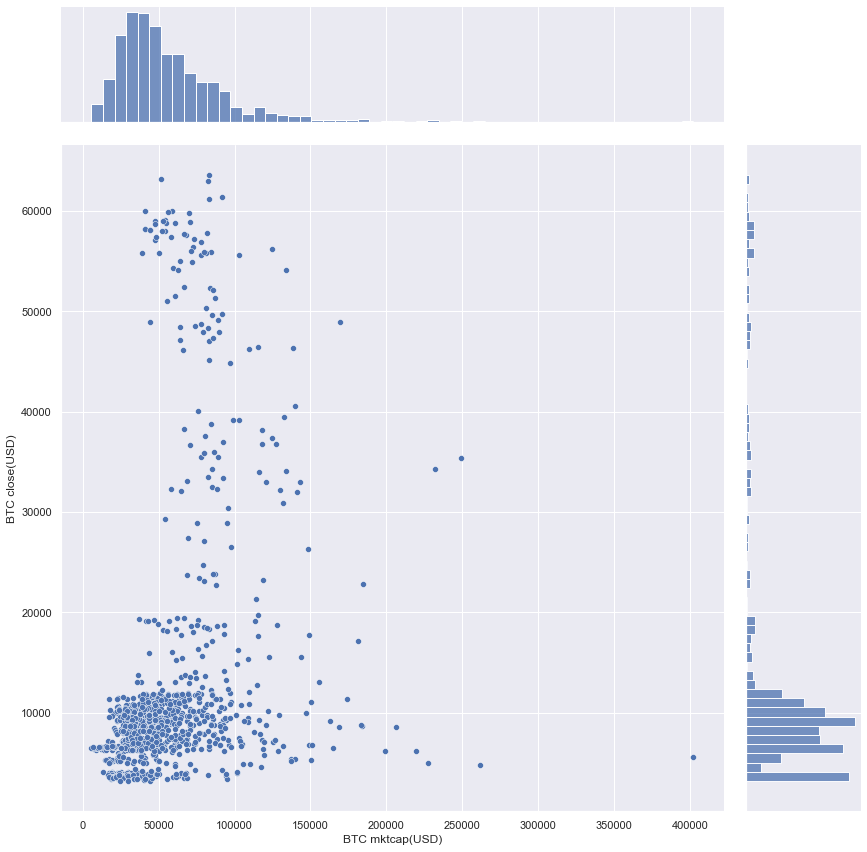

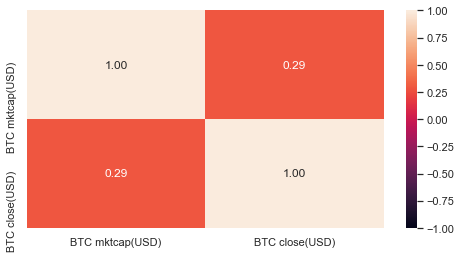

In [24]:
f, axes = plt.subplots(1, 3, figsize=(24, 6))
Bi_Variate(crypto_data, "BTC mktcap(USD)", "BTC close(USD)")

<Figure size 1728x288 with 0 Axes>

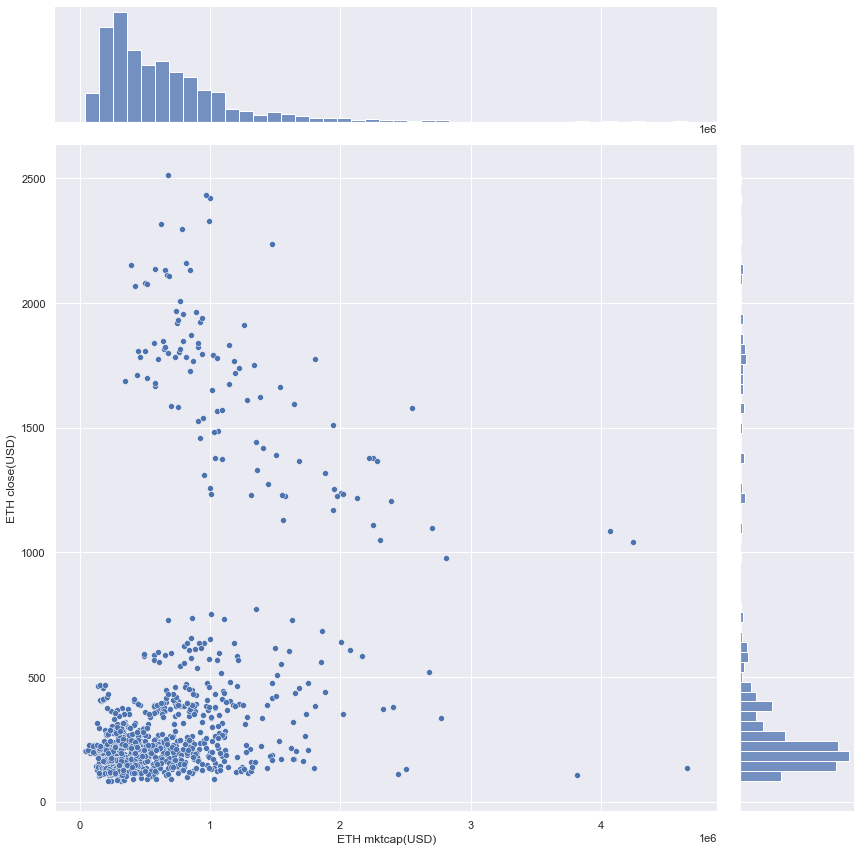

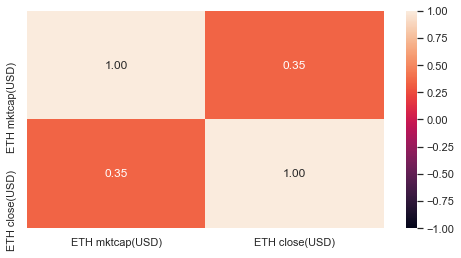

In [25]:
Bi_Variate(crypto_data, "ETH mktcap(USD)", "ETH close(USD)")

Evaluation of Exploratory Analysis: 

It was observed across all ten cryptocurrencies that Market Capitalization has a poor correlation with Closing Value, as shown above. Thus, market capitalization should not be used by investors to predict future prices. However, it was observed that there was a strong correlation between daily closing prices of various cryptocurrencies. This is especially noticeable in Bitcoin, Ethereum and Binance Coin.

Thus, by building a mathematical model that can forecast future prices of a particular cryptocurrency, investors will be able to predict prices for other currencies that show strong correlation as well. This will be further explored using Neural Networks.